# PROJECT BY : MEGHA AGRAWAL

# SIMPLE LINEAR REGRESSION

Predicting the percentage of student based on the number of study hours.

In [53]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
# Reading the data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Our target variable is Scores and our independent variable is Hours

Checking if there is any relationship between the target variable and the independent variable

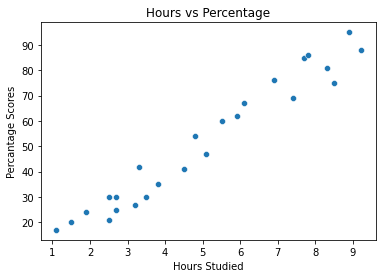

In [55]:
# Plotting a scatter plot
sns.scatterplot(x= "Hours", y = "Scores", data= df)
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percantage Scores")
plt.show()

There is linear relationship between percentage scores and hours studied

## Preparing Data

Dividing the data into two parts - X the input variable and y the output variable

In [56]:
X = df.iloc[:,:-1].values
y = df.iloc[:, 1].values

In [57]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [58]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Spliting the data into training dataset and test dataset

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 0)

## Training the algorithim 

In [60]:
from sklearn.linear_model import LinearRegression
sm = LinearRegression()
sm.fit(X_train, y_train)

LinearRegression()

In [61]:
# Checking the coefficinet and intercept of the model
print("The coefficient of the model is :", sm.coef_)
print("The intercept of the model is :" ,sm.intercept_)

The coefficient of the model is : [9.91065648]
The intercept of the model is : 2.018160041434683


Therefore our model is : y = 2.018 + 9.911 * X

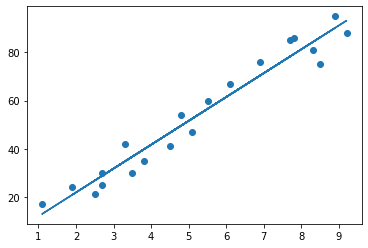

In [62]:
# Plotting the training data and the model 
plt.scatter(X_train, y_train)
plt.plot(X_train, sm.intercept_+sm.coef_*X_train )

## Making Predictions

In [63]:
y_pred = sm.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [64]:
# Comparing Actula vs predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [68]:
# Checking the predicted value for a specific X value
hour = np.array([9.25]).reshape(1,1)
own_pred = sm.predict(hour)
print("No. of hours = {}".format(hour[0][0]))
print("The Predicted Score = {}".format(own_pred[0]))

No. of hours = 9.25
The Predicted Score = 93.69173248737538


## Evaluating the model

In [69]:
# Evaluating the model through mean absolute error
from sklearn import metrics
print("mean absolute error :", metrics.mean_absolute_error(y_test, y_pred))

mean absolute error : 4.183859899002975


In [70]:
# Also checking R square of the model 
from sklearn.metrics import r2_score
print("R square :", r2_score(y_test, y_pred))

R square : 0.9454906892105356


R square for the model is high and the mean absolute error is low, indicating a good model.